In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [6]:
cities

['lebowakgomo',
 'manta',
 'manono',
 'east london',
 'talaya',
 'mys shmidta',
 'rikitea',
 'sao joao da barra',
 'codrington',
 'samalaeulu',
 'sisophon',
 'port elizabeth',
 'avarua',
 'mataura',
 'pedro ii',
 'illoqqortoormiut',
 'kaeo',
 'nikolskoye',
 'puerto ayora',
 'ust-omchug',
 'atuona',
 'albany',
 'margate',
 'ha tinh',
 'shingu',
 'busselton',
 'chokurdakh',
 'hermanus',
 'kapaa',
 'ribeira grande',
 'dinsor',
 'tuktoyaktuk',
 'hobart',
 'husavik',
 'kajaani',
 'luderitz',
 'sulangan',
 'matara',
 'bluff',
 'yellowknife',
 'jamestown',
 'jaque',
 'hihifo',
 'sydney',
 'goderich',
 'new norfolk',
 'vaitupu',
 'bargal',
 'adrar',
 'enumclaw',
 'biak',
 'taolanaro',
 'wuzhou',
 'pevek',
 'palauig',
 'ilulissat',
 'barrow',
 'cairns',
 'quimperle',
 'punta arenas',
 'ornskoldsvik',
 'mar del plata',
 'santa fe',
 'xiaoshi',
 'samusu',
 'sierra vista',
 'umm jarr',
 'butaritari',
 'tiksi',
 'umm kaddadah',
 'anadyr',
 'grand gaube',
 'rafraf',
 'port blair',
 'hilo',
 'saskyla

In [7]:
#Import the request library
import requests

# Import the API key.
from config import weather_api_key


In [8]:
# Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3eb5db8564aa00e965bac3a34dfb2af2


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Processing Record 1 of Set 1 | lebowakgomo
Processing Record 2 of Set 1 | manta
Processing Record 3 of Set 1 | manono
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | talaya
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | sao joao da barra
Processing Record 9 of Set 1 | codrington
Processing Record 10 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 11 of Set 1 | sisophon
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | pedro ii
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | kaeo
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | ust-omchug
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | alban

Processing Record 42 of Set 4 | kayes
Processing Record 43 of Set 4 | makubetsu
Processing Record 44 of Set 4 | ocala
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | rungata
City not found. Skipping...
Processing Record 48 of Set 4 | chicama
Processing Record 49 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 50 of Set 4 | talesh
City not found. Skipping...
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | alotau
City not found. Skipping...
Processing Record 3 of Set 5 | capaccio
Processing Record 4 of Set 5 | yenagoa
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | shambu
Processing Record 7 of Set 5 | dikson
Processing Record 8 of Set 5 | cabedelo
Processing Record 9 of Set 5 | formosa
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 | namatanai
Processing Record 12 of Set 5 | privokzalnyy
City not found. Skipping...
Processing Record 13 of Set 5

Processing Record 32 of Set 8 | tarudant
City not found. Skipping...
Processing Record 33 of Set 8 | yakeshi
Processing Record 34 of Set 8 | toora-khem
Processing Record 35 of Set 8 | sucre
Processing Record 36 of Set 8 | wanaka
Processing Record 37 of Set 8 | oliveira
Processing Record 38 of Set 8 | hami
Processing Record 39 of Set 8 | avera
Processing Record 40 of Set 8 | meyungs
City not found. Skipping...
Processing Record 41 of Set 8 | high level
Processing Record 42 of Set 8 | havelock
Processing Record 43 of Set 8 | aketi
Processing Record 44 of Set 8 | muisne
Processing Record 45 of Set 8 | bokspits
City not found. Skipping...
Processing Record 46 of Set 8 | dargaville
Processing Record 47 of Set 8 | rio grande
Processing Record 48 of Set 8 | wanning
Processing Record 49 of Set 8 | roma
Processing Record 50 of Set 8 | pangnirtung
Processing Record 1 of Set 9 | winnemucca
Processing Record 2 of Set 9 | nizhniy tsasuchey
Processing Record 3 of Set 9 | kungurtug
Processing Record 

Processing Record 15 of Set 12 | tondi
Processing Record 16 of Set 12 | mana
Processing Record 17 of Set 12 | nyurba
Processing Record 18 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 12 | linchuan
City not found. Skipping...
Processing Record 20 of Set 12 | koungou
Processing Record 21 of Set 12 | kitami
Processing Record 22 of Set 12 | banjar
Processing Record 23 of Set 12 | agadez
Processing Record 24 of Set 12 | dillon
Processing Record 25 of Set 12 | dudinka
Processing Record 26 of Set 12 | derzhavinsk
Processing Record 27 of Set 12 | mmabatho
Processing Record 28 of Set 12 | luanda
Processing Record 29 of Set 12 | mpophomeni
Processing Record 30 of Set 12 | khasan
Processing Record 31 of Set 12 | chapais
Processing Record 32 of Set 12 | grindavik
Processing Record 33 of Set 12 | bam
Processing Record 34 of Set 12 | shetpe
Processing Record 35 of Set 12 | tiarei
Processing Record 36 of Set 12 | marga
Processing Record 37 of Set 12 | salalah
Proc

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebowakgomo,-24.2000,29.5000,54.50,68,0,3.44,ZA,2022-05-05 00:53:53
1,Manta,-0.9500,-80.7333,78.58,78,75,9.22,EC,2022-05-05 00:53:53
2,Manono,-7.3000,27.4167,67.41,83,46,4.21,CD,2022-05-05 00:53:54
3,East London,-33.0153,27.9116,64.44,81,27,4.54,ZA,2022-05-05 00:53:54
4,Talaya,61.3833,152.7500,30.94,81,28,1.68,RU,2022-05-05 00:53:55
5,Rikitea,-23.1203,-134.9692,77.63,84,92,20.47,PF,2022-05-05 00:53:55
6,Sao Joao Da Barra,-21.6403,-41.0511,77.50,87,93,16.08,BR,2022-05-05 00:53:56
7,Codrington,-38.2667,141.9667,53.46,63,84,6.60,AU,2022-05-05 00:53:56
8,Sisophon,13.5859,102.9737,79.23,64,99,4.76,KH,2022-05-05 00:53:57
9,Port Elizabeth,-33.9180,25.5701,60.10,94,20,3.44,ZA,2022-05-05 00:52:13


In [23]:
# Reorder the columns in the order you want them to appear
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign city_data_df the new column order
city_data_df = city_data_df[new_column_order]

In [24]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebowakgomo,ZA,2022-05-05 00:53:53,-24.2000,29.5000,54.50,68,0,3.44
1,Manta,EC,2022-05-05 00:53:53,-0.9500,-80.7333,78.58,78,75,9.22
2,Manono,CD,2022-05-05 00:53:54,-7.3000,27.4167,67.41,83,46,4.21
3,East London,ZA,2022-05-05 00:53:54,-33.0153,27.9116,64.44,81,27,4.54
4,Talaya,RU,2022-05-05 00:53:55,61.3833,152.7500,30.94,81,28,1.68
5,Rikitea,PF,2022-05-05 00:53:55,-23.1203,-134.9692,77.63,84,92,20.47
6,Sao Joao Da Barra,BR,2022-05-05 00:53:56,-21.6403,-41.0511,77.50,87,93,16.08
7,Codrington,AU,2022-05-05 00:53:56,-38.2667,141.9667,53.46,63,84,6.60
8,Sisophon,KH,2022-05-05 00:53:57,13.5859,102.9737,79.23,64,99,4.76
9,Port Elizabeth,ZA,2022-05-05 00:52:13,-33.9180,25.5701,60.10,94,20,3.44


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

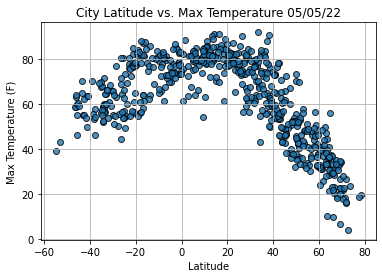

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

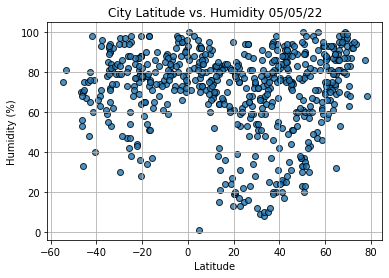

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

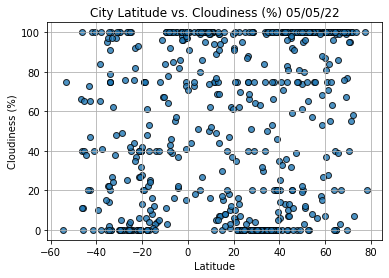

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

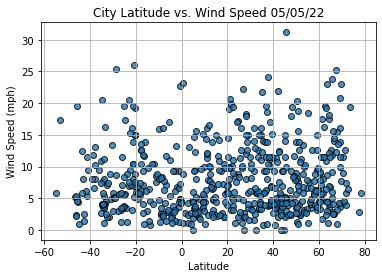

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()